## Simulating at higher temperatures and setting $Q_{10}$ values

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 2000)
pd.set_option("display.float_format", "{:,.4f}".format)

In [3]:
from pyloric import create_prior, simulate, stats
from pyloric.utils import show_traces
import torch

### Create prior

In [4]:
prior = create_prior()
_ = torch.manual_seed(2)
p = prior.sample((1,))
p

AB/PD                                                           LP                                                           PY                                                     Synapses                                                     
        Na    CaT    CaS       A     KCa      Kd      H   Leak       Na    CaT    CaS       A    KCa       Kd      H   Leak       Na    CaT    CaS       A    KCa       Kd      H   Leak    AB-LP    PD-LP   AB-PY    PD-PY    LP-PD    LP-PY    PY-LP
0 458.7803 0.7269 5.6700 32.4157 13.6989 90.7140 0.0024 0.0027 138.5559 1.1557 2.8209 44.1501 6.1972 100.9982 0.0440 0.0210 564.8376 2.4631 3.0317 33.4177 3.7200 120.6760 0.0477 0.0278 -12.5681 -16.8734 -8.3747 -18.1356 -16.2665 -13.3063 -18.0895

### Simulate and keep track of energy consumption

In [5]:
simulation_output = simulate(p.loc[0], track_energy=True, seed=1)

### Visualize voltage trace

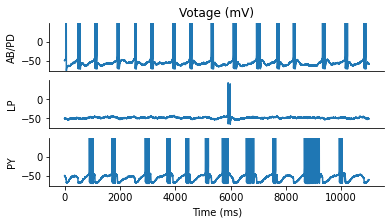

In [6]:
_ = show_traces(simulation_output)

### Compute summary statistics

In [29]:
pd.set_option("display.float_format", "{:,.1f}".format)

In [30]:
summstats = stats(simulation_output)
summstats

cycle_period burst_durations            duty_cycles         start_phases     starts_to_starts       ends_to_starts       phase_gaps      
       Circuit              PM   LP    PY          PM  LP  PY           LP  PY         AB/PD-LP LP-PY       AB/PD-LP LP-PY   AB/PD-LP LP-PY
0        810.4            75.4 73.4 170.7         0.1 0.1 0.2          nan nan              nan   nan            nan   nan        nan   nan

### Compute summstats including additional features
All energies in nJ / $\text{cm}^2$

In [31]:
summstats = stats(
    simulation_output, 
    stats_customization={
        "plateau_durations": True, 
        "num_bursts": True, 
        "energies": True, 
        "energies_per_burst": True, 
        "energies_per_spike": True
    }
)
summstats

cycle_period burst_durations            duty_cycles         start_phases     starts_to_starts       ends_to_starts       phase_gaps       plateau_durations         num_bursts          energies                energies_per_burst               energies_per_spike            
       Circuit              PM   LP    PY          PM  LP  PY           LP  PY         AB/PD-LP LP-PY       AB/PD-LP LP-PY   AB/PD-LP LP-PY                PM  LP  PY         PM  LP   PY       PM    LP       PY                 PM    LP      PY                 PM    LP    PY
0        810.4            75.4 73.4 170.7         0.1 0.1 0.2          nan nan              nan   nan            nan   nan        nan   nan               2.5 2.5 2.5       13.0 1.0 10.0 22,794.0 470.2 31,964.4            1,645.8 206.9 3,091.3              486.2 103.4 562.1